How does the mutation rate of COVID-19 compare to other viruses?

My notebook does an analysis between the murtation rates between four different coronaviruses - Sars-cov2, SARS, MERS and 229E (a common human coronavirus)

To plot a mutation graph for a virus, I first do a multiple alignment of the virus using a tool provide by NCBI - https://www.ncbi.nlm.nih.gov/labs/virus/vssi/#/.
The the link above redirects to the page where you can type in the virus's name and select different Accseions to choose which ones to align. After selecting them there is align button on top of the page which does multiple alignement of the virus's genome. There is a doenload option to download the the sequenced data. 

For calculation a mutation of the virus I use the bellow formula -
mutation(seqi) = mismatches(seqi,seqj), where j < i, j and i are the days.
(essentially finding the difference between the current sequence and the last found sequence)
for mismatches, I consider insertion,deletions and substitutions as mutations, so I find calculate the total number of characters that are not equal in the two sequences sequences.

mutaion according to this defination is the change in nucleotides in a virus's genome.


In [4]:
#mismatches takes in two virus sequence and finds the total mismatches
def mismatches(seq1, seq2):
    miss = 0
    for i in range(len(seq1)):
        if seq1[i] != seq2[i]:
            if seq1[i] != '-':
                miss += 1
    return miss

In [23]:
#data preprocessing 

#matches the sequence name in the downloaded file to the give sequence name
def findSeq(query, seqNames):
    for i in seqNames:
        if query.find(i) > 0:
            return i
    print("no such sequence found")

#takes in a file with .aln and and cleans up the sequences to strings
def getMutationScores(filename, seqNames):
    file = open(filename, 'r')
    str1 = ""
    cleanSeqs = {}
    for i in file:
        str1 += i
    seqData = str1.strip().split('>')
    seqData = seqData[1:]
    for seq in seqData:
        seqStr = seq.strip().split("\n")
        cleanSeqs[findSeq(seqStr[0], seqNames)] = ("".join(seqStr[1:]))
    mismatchScores = []
    for i in range(len(seqNames)-1):
        mismatchScores.append(mismatches(
            cleanSeqs[seqNames[i]], cleanSeqs[seqNames[i+1]]))
    return([0] + mismatchScores)


I have chosen a few smaples of the virus from NCBI and tried to keep their smaples from the same location.(couldn't find enough data on covid-19 to pertain to a single region). I also tried to keep the collection date of the samples a month apart.

In [24]:
seqNamesSARS = ['FJ882928', 'FJ882926',
                'FJ882931', 'FJ882954', 'KF514395', 'KF514389']
seqNames229E = ['HM130806', 'HM130807',
                'GU068546', 'GU068547', 'GU068549', 'HM130809']
seqNameMERS = ['KT368824', 'KT368825', 'KT368827',
               'KT368851', 'KT368848', 'KT368843']
seqNameSarsCovid_2 = ['LR757997', 'MT079851',
                      'MT415376', 'MT396241', 'MT476385', 'MT467263']


In [25]:
import pandas as pd
SARS_data = pd.read_csv("SARS.csv")
SARS_data

,Accession,Release_Date,Species,Length,Sequence_Type,Nuc_Completeness,Genotype,Geo_Location,Host,Isolation_Source,Collection_Date
0,KF514389,2013-08-17T00:00:00Z,Severe acute respiratory syndrome-related coro...,29687,GenBank,complete,NaN,"USA: Nashville, TN",NaN,NaN,2009-05-19
1,KF514395,2013-08-17T00:00:00Z,Severe acute respiratory syndrome-related coro...,29687,GenBank,complete,NaN,"USA: Nashville, TN",NaN,NaN,2009-03-18
2,FJ882926,2009-12-13T00:00:00Z,Severe acute respiratory syndrome-related coro...,29675,GenBank,complete,NaN,USA: Tennessee,NaN,NaN,2007-09-22
3,FJ882928,2009-12-13T00:00:00Z,Severe acute respiratory syndrome-related coro...,29687,GenBank,complete,NaN,USA: Tennessee,NaN,NaN,2007-08-28
4,FJ882931,2009-12-13T00:00:00Z,Severe acute respiratory syndrome-related coro...,29646,GenBank,complete,NaN,USA: Tennessee,NaN,NaN,2008-03-28
5,FJ882954,2009-12-13T00:00:00Z,Severe acute respiratory syndrome-related coro...,29636,GenBank,complete,NaN,USA: Tennessee,NaN,NaN,2008-08-06


In [26]:
MERS_data = pd.read_csv("MERS.csv")
MERS_data

,Accession,Release_Date,Species,Length,Sequence_Type,Nuc_Completeness,Genotype,Segment,Geo_Location,Host,Isolation_Source,Collection_Date
0,KT368824,2015-12-17T00:00:00Z,Middle East respiratory syndrome-related coron...,30115,GenBank,complete,NaN,NaN,Saudi Arabia,Camelus,NaN,2014-05
1,KT368825,2015-12-17T00:00:00Z,Middle East respiratory syndrome-related coron...,30119,GenBank,complete,NaN,NaN,Saudi Arabia,Camelus,NaN,2014-07
2,KT368827,2015-12-17T00:00:00Z,Middle East respiratory syndrome-related coron...,30114,GenBank,complete,NaN,NaN,Saudi Arabia,Camelus,NaN,2014-09
3,KT368843,2015-12-17T00:00:00Z,Middle East respiratory syndrome-related coron...,30118,GenBank,complete,NaN,NaN,Saudi Arabia,Camelus,NaN,2014-12
4,KT368848,2015-12-17T00:00:00Z,Middle East respiratory syndrome-related coron...,30118,GenBank,complete,NaN,NaN,Saudi Arabia,Camelus,NaN,2014-11
5,KT368851,2015-12-17T00:00:00Z,Middle East respiratory syndrome-related coron...,30119,GenBank,complete,NaN,NaN,Saudi Arabia,Camelus,NaN,2014-10


In [27]:
common229E_data = pd.read_csv("229E.csv")
common229E_data

,Accession,Release_Date,Species,Length,Sequence_Type,Nuc_Completeness,Genotype,Segment,Geo_Location,Host,Isolation_Source,Collection_Date
0,HM130806,2010-10-13T00:00:00Z,Human coronavirus 229E,379,GenBank,partial,NaN,NaN,China,Homo sapiens,NaN,2007-10-23
1,HM130807,2010-10-13T00:00:00Z,Human coronavirus 229E,379,GenBank,partial,NaN,NaN,China,Homo sapiens,NaN,2007-11-17
2,HM130809,2010-10-13T00:00:00Z,Human coronavirus 229E,379,GenBank,partial,NaN,NaN,China,Homo sapiens,NaN,2009-01-06
3,GU068546,2010-07-24T00:00:00Z,Human coronavirus 229E,1641,GenBank,partial,NaN,NaN,China:Shanghai,Homo sapiens,NaN,2007-12-17
4,GU068547,2010-07-24T00:00:00Z,Human coronavirus 229E,1643,GenBank,partial,NaN,NaN,China:Shanghai,Homo sapiens,NaN,2008-01-17
5,GU068549,2010-07-24T00:00:00Z,Human coronavirus 229E,1642,GenBank,partial,NaN,NaN,China:Shanghai,Homo sapiens,NaN,2008-02-21


In [28]:
SARSCOV2_data = pd.read_csv("SAR-COV2.csv")
SARSCOV2_data

,Accession,Release_Date,Species,Length,Sequence_Type,Nuc_Completeness,Genotype,Segment,Geo_Location,Host,Isolation_Source,Collection_Date
0,MT079851,2020-05-15T00:00:00Z,Severe acute respiratory syndrome-related coro...,30018,GenBank,complete,NaN,NaN,China,Homo sapiens,NaN,2020-01-22
1,MT476385,2020-05-15T00:00:00Z,Severe acute respiratory syndrome-related coro...,29902,GenBank,complete,NaN,NaN,Bangladesh,Homo sapiens,NaN,2020-04-18
2,MT467263,2020-05-14T00:00:00Z,Severe acute respiratory syndrome-related coro...,29800,GenBank,complete,NaN,NaN,India: Dhansura,Homo sapiens,NaN,2020-05-04
3,MT415376,2020-04-30T00:00:00Z,Severe acute respiratory syndrome-related coro...,3822,GenBank,partial,NaN,NaN,China,Homo sapiens,NaN,2020-02-15
4,MT396241,2020-04-28T00:00:00Z,Severe acute respiratory syndrome-related coro...,29900,GenBank,complete,NaN,NaN,China,NaN,NaN,2020-03-06
5,LR757997,2020-02-01T00:00:00Z,Severe acute respiratory syndrome-related coro...,29388,GenBank,partial,NaN,NaN,China:Wuhan,Homo sapiens,NaN,2019-12-31


In [29]:
SARS_SCORES = getMutationScores('SARS.aln', seqNamesSARS)
common229E_SCORES = getMutationScores('229E.aln', seqNames229E)
MERSCOV_SCORES = getMutationScores('MERS-COV.aln', seqNameMERS)
SARSCOV2_SCORES = getMutationScores('SARS-COV2.aln', seqNameSarsCovid_2)                                
print('SARS SCORES :' ,SARS_SCORES)
print('229E SCORES : ' ,common229E_SCORES)
print('MERS-COV SCORES',MERSCOV_SCORES)
print('SARS-COV2 SCORES',SARSCOV2_SCORES)

SARS SCORES : [0, 18, 46, 24, 19, 0]
229E SCORES :  [0, 2, 106, 5, 11, 1370]
MERS-COV SCORES [0, 80, 45, 21, 70, 74]
SARS-COV2 SCORES [0, 10172, 26197, 1, 11, 115]


In [22]:
import matplotlib.pyplot as plt

In [31]:
SARS_COV2 = pd.DataFrame({'days': [0,30,54,72,115,141]})
SARS_COV2['seq_names'] =  ['LR757997', 'MT079851',
                      'MT415376', 'MT396241', 'MT476385', 'MT467263']
SARS_COV2['mutation_scores'] =  SARSCOV2_SCORES
SARS_COV2

,days,seq_names,mutation_scores
0,0,LR757997,0
1,30,MT079851,10172
2,54,MT415376,26197
3,72,MT396241,1
4,115,MT476385,11
5,141,MT467263,115


Text(0,0.5,'mutation - change in nucleotides')

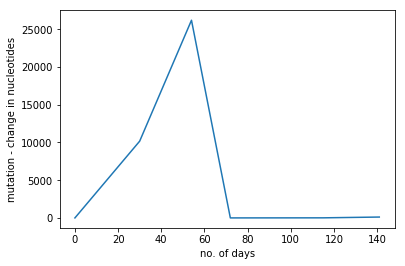

In [33]:
plt.plot(SARS_COV2['days'],SARS_COV2['mutation_scores'])
plt.xlabel("no. of days")
plt.ylabel("mutation - change in nucleotides")

In [34]:
common229E = pd.DataFrame({'days': [0,24,54,85,115,150]})
common229E['seq_names'] =  seqNames229E
common229E['mutation_scores'] =  common229E_SCORES
common229E

,days,seq_names,mutation_scores
0,0,HM130806,0
1,24,HM130807,2
2,54,GU068546,106
3,85,GU068547,5
4,115,GU068549,11
5,150,HM130809,1370


Text(0,0.5,'mutation - change in nucleotides')

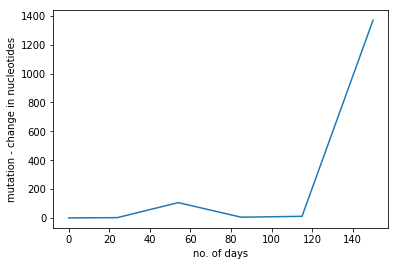

In [35]:
plt.plot(common229E['days'],common229E['mutation_scores'])
plt.xlabel("no. of days")
plt.ylabel("mutation - change in nucleotides")

In [38]:
SARS = pd.DataFrame({'days': [0,35,198,354,578,640]})
SARS['seq_names'] =  seqNamesSARS
SARS['mutation_scores'] =  SARS_SCORES
SARS

,days,seq_names,mutation_scores
0,0,FJ882928,0
1,35,FJ882926,18
2,198,FJ882931,46
3,354,FJ882954,24
4,578,KF514395,19
5,640,KF514389,0


Text(0,0.5,'mutation - change in nucleotides')

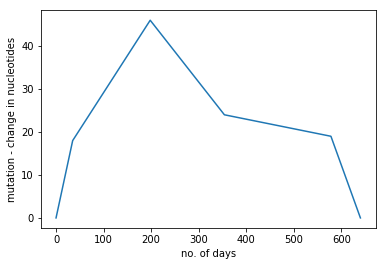

In [39]:
plt.plot(SARS['days'],SARS['mutation_scores'])
plt.xlabel("no. of days")
plt.ylabel("mutation - change in nucleotides")

In [41]:
MERS = pd.DataFrame({'days': [0,60,120,150,180,210]})
MERS['seq_names'] =  seqNamesSARS
MERS['mutation_scores'] =  MERSCOV_SCORES
MERS

,days,seq_names,mutation_scores
0,0,FJ882928,0
1,60,FJ882926,80
2,120,FJ882931,45
3,150,FJ882954,21
4,180,KF514395,70
5,210,KF514389,74


Text(0,0.5,'mutation - change in nucleotides')

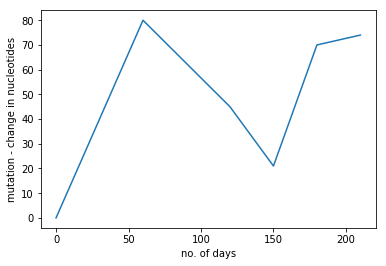

In [42]:
plt.plot(MERS['days'],MERS['mutation_scores'])
plt.xlabel("no. of days")
plt.ylabel("mutation - change in nucleotides")